In [26]:
from PIL import Image
import os, glob
print("PIL 라이브러리 import 완료!")

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras


PIL 라이브러리 import 완료!


In [42]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28사이즈로 바꾸어 저장
target_size = (28,28)
for img in images:
    old_img = Image.open(img)
    
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac29/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [28]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28사이즈로 바꾸어 저장
target_size = (28,28)
for img in images:
    old_img = Image.open(img)
    
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac29/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [99]:
folder_list_dir = os.getenv("HOME") + "/aiffel/friends_list/"
folder_list = os.listdir(folder_list_dir)

for i in range(len(folder_list)):
    image_dir_path = folder_list_dir + folder_list[i] + "/paper"
    print("이미지 디렉토리 경로: ", image_dir_path)

    images = glob.glob(image_dir_path + "/*.jpg")

    # 파일마다 모두 28x28사이즈로 바꾸어 저장
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
    
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print("보 이미지 resize 완료!")
    

이미지 디렉토리 경로:  /home/ssac29/aiffel/friends_list/rock_scissor_paper_Hong_gahee/paper
보 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac29/aiffel/friends_list/rock_scissor_paper_Kim_Yonguk/paper
보 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac29/aiffel/friends_list/rock_scissor_paper_Jeong_Hyunjae/paper
보 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac29/aiffel/friends_list/rock_scissor_paper_Kim_Bogeoung/paper
보 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac29/aiffel/friends_list/rock_scissor_paper_Kim_Jeongsu/paper
보 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac29/aiffel/friends_list/rock_scissor_paper_Kim_jino/paper
보 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac29/aiffel/friends_list/rock_scissor_paper_Ko_Eunchae/paper
보 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac29/aiffel/friends_list/rock_scissor_paper_Song_yongho/paper
보 이미지 resize 완료!


In [65]:
# 특정 디렉토리에 있는 이미지 파일의 픽셀데이터 행렬로 불러오는 함수 작성

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels


In [98]:
# 트레인셋 만들기

# load_data() 함수로 x_train 데이터와 y_train 데이터 생성
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
#(x_train, y_train)=load_data(image_dir_path)
##print(x_train, y_train)

# 폴더별로 돌면서 load_data()결과 누적
folder_list_dir = os.getenv("HOME") + "/aiffel/friends_list/"
folder_list = os.listdir(folder_list_dir)
print(folder_list)
print(len(folder_list))

x_train, y_train = [], []
print(x_train, y_train)

for i in range(len(folder_list)):
    image_path = folder_list_dir + folder_list[i]
    print(image_path)
    load_data(image_path)
    #print(x_train)
    #(x_train, y_train) = load_data(image_dir_path[0])


# x_train_norm 에 정규화된 x_train 데이터 생성

# x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
# 
# print("x_train shape: {}".format(x_train.shape))
# print("x_train_norm shape: {}".format(x_train_norm.shape))
# print("y_train shape: {}".format(y_train.shape))

['rock_scissor_paper_Hong_gahee', 'rock_scissor_paper_Kim_Yonguk', 'rock_scissor_paper_Jeong_Hyunjae', 'rock_scissor_paper_Kim_Bogeoung', 'rock_scissor_paper_Kim_Jeongsu', 'rock_scissor_paper_Kim_jino', 'rock_scissor_paper_Ko_Eunchae', 'rock_scissor_paper_Song_yongho']
8
[] []
/home/ssac29/aiffel/friends_list/rock_scissor_paper_Hong_gahee
학습데이터(x_train)의 이미지 개수는 300 입니다.
/home/ssac29/aiffel/friends_list/rock_scissor_paper_Kim_Yonguk
학습데이터(x_train)의 이미지 개수는 300 입니다.
/home/ssac29/aiffel/friends_list/rock_scissor_paper_Jeong_Hyunjae


ValueError: could not broadcast input array from shape (224,224,3) into shape (28,28,3)

라벨:  0
[[[121 132 126]
  [121 132 126]
  [120 131 125]
  ...
  [156 171 166]
  [157 173 170]
  [159 175 172]]

 [[121 132 126]
  [121 132 126]
  [122 131 126]
  ...
  [158 173 168]
  [159 175 172]
  [161 177 174]]

 [[122 131 126]
  [122 131 126]
  [122 131 126]
  ...
  [162 174 170]
  [162 177 174]
  [163 179 176]]

 ...

 [[ 17  13  12]
  [ 10   6   5]
  [  7   6   4]
  ...
  [186 192 182]
  [187 193 183]
  [187 195 184]]

 [[  5   3   4]
  [  6   6   6]
  [ 15  15  15]
  ...
  [186 192 182]
  [186 194 183]
  [187 195 184]]

 [[ 27  29  28]
  [ 44  46  45]
  [ 72  76  75]
  ...
  [185 193 182]
  [186 194 183]
  [187 195 184]]]


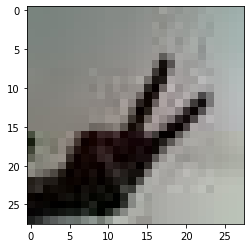

In [66]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])
print(x_train[0])


In [33]:
# 학습모델 생성

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [59]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)


Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9967
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9967
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 9.0080e-04 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 7.9200e-04 - accuracy: 1.0000



# 테스트데이터 생성


In [50]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_Kim_Bogeoung/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28사이즈로 바꾸어 저장
target_size = (28,28)
for img in images:
    old_img = Image.open(img)
    
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac29/aiffel/rock_scissor_paper_Kim_Bogeoung/scissor
가위 이미지 resize 완료!


In [51]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_Kim_Bogeoung/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28사이즈로 바꾸어 저장
target_size = (28,28)
for img in images:
    old_img = Image.open(img)
    
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac29/aiffel/rock_scissor_paper_Kim_Bogeoung/rock
바위 이미지 resize 완료!


In [52]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_Kim_Bogeoung/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28사이즈로 바꾸어 저장
target_size = (28,28)
for img in images:
    old_img = Image.open(img)
    
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac29/aiffel/rock_scissor_paper_Kim_Bogeoung/paper
보 이미지 resize 완료!


In [53]:
# 테스트셋 만들기

# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]

# load_data() 함수로 x_test 데이터와 y_test 데이터 생성

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_Kim_Bogeoung"
(x_test, y_test)=load_data(image_dir_path)


# x_test_norm 에 정규화된 x_test 데이터 생성

x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("x_test_norm shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
x_test_norm shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


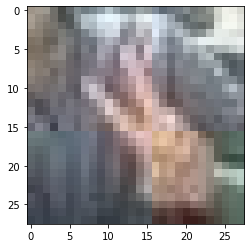

In [54]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [60]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2287.2725 - accuracy: 0.3200
test_loss: 2287.2724609375 
test_accuracy: 0.3199999928474426


In [64]:
# 데이터 합치기

import os

i = 100  # 해당 인덱스부터 차례대로 이름 지정
file_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_Hong_gahee"  # 변경하고자하는 파일이 있는 폴더의 디렉토리 경로

file_name = os.listdir(file_path)
print(file_name)

for idx, name in enumerate(file_name):
    src = os.path.join(file_path, name)
    new_name = os.path.join(file_path, str(i+idx))

['rock', 'scissor', 'paper']
